In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Task 1: Examine the data, there may be some anomalies in the data, and you will have to clean the data
# before you move forward to other tasks. Explain what you did to clean the data. 

In [4]:
# Check for zeroes in host_id, latitude, longitude, price, minimum nights, # of reviews, availability_365 and evaluate
# Zeroes in host_id, there are none
((df['host_id'] == 0)).any()

False

In [5]:
# Zeroes in latitude, there are none
((df['latitude'] == 0)).any()

False

In [6]:
# Zeroes in longitude, there are none
((df['longitude'] == 0)).any()

False

In [7]:
# Zeroes in minimum_nights, there are none
((df['minimum_nights'] == 0)).any()

False

In [8]:
# Zeroes in price, there are some
((df['price'] == 0)).any()

True

In [9]:
# (df['price'] == 0).sum()
len(df.loc[df['price'] == 0])

11

In [10]:
# Check number of listings before
len(df)

48895

In [11]:
# Remove zero rows because removing only 11 out of all 48895 values wouldn't change much. Values can be removed with below code
# df.drop(df[df['price'] <= 0].index, inplace = True)

In [12]:
# Check number of listings after if you choose to remove 0 rows due to price
len(df)

48895

In [13]:
# Zeroes in number_of_reviews, there are some, which is fine because some listings may not have been occupied
((df['number_of_reviews'] == 0)).any()

True

In [14]:
# Zeroes in availability_365, there are some, which is fine because some listings might be booked fully
((df['availability_365'] == 0)).any()

True

In [15]:
# Next step of clean is to look for outliers, can do so by using box plots

<AxesSubplot:>

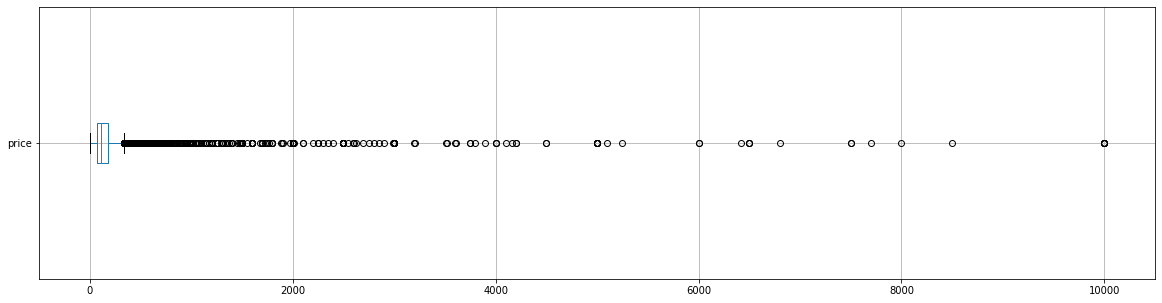

In [16]:
# Boxplot for prices, there are some outliers
df.boxplot(column=['price'], vert=False, figsize=(20,5))

In [17]:
# Checking listings with prices over 4000. They seem to be expensive because of the location, minimum nights, and 
# because some are luxury apartments as indicated by the name. Wouldn't make sense to remove these listings. 
df.loc[df['price'] > 4000].sort_values(by=['price'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42736,33171891,30 days minimum Time square West Midtown apart...,177396569,Yanina,Manhattan,Hell's Kitchen,40.76043,-73.99132,Entire home/apt,4100,30,0,NaN,NaN,3,180
28947,22296197,"Chelsea Gallery for events, exhibitions, fashion",3750764,Kevin,Manhattan,Chelsea,40.74888,-74.00481,Entire home/apt,4160,1,0,NaN,NaN,6,364
45867,34981637,bay ridge & sunset park furnished apartment,263564234,Nony,Brooklyn,Bay Ridge,40.63087,-74.02006,Entire home/apt,4200,60,0,NaN,NaN,1,90
43670,33796251,Beautiful private Brooklyn room with kitchenette,8748976,Jeffrey,Brooklyn,Bedford-Stuyvesant,40.68807,-73.95426,Private room,4200,114,0,NaN,NaN,1,347
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,2018-12-29,0.09,11,365
46614,35345358,Northside Williamsburg Stunner,956324,Alex,Brooklyn,Williamsburg,40.71705,-73.96470,Entire home/apt,4500,30,0,NaN,NaN,1,365
38000,30035166,4-Floor Unique Event Space 50P Cap. - #10299B,172611460,Rasmus,Manhattan,Harlem,40.82511,-73.94961,Entire home/apt,5000,1,2,2019-02-23,0.38,2,150
26739,21238053,Broadway 1,153497815,Sarah-B,Brooklyn,Bedford-Stuyvesant,40.68742,-73.91957,Entire home/apt,5000,2,8,2017-12-09,0.38,1,0
25825,20654227,Fulton 2,100069033,Sarah-2,Brooklyn,Cypress Hills,40.68185,-73.88128,Entire home/apt,5000,2,4,2018-01-03,0.18,1,0
22353,18051877,Victorian Film location,2675644,Alissa,Staten Island,Randall Manor,40.63952,-74.09730,Entire home/apt,5000,1,0,NaN,NaN,1,344


In [18]:
# Task 2: Examine how the prices of the Airbnb changes with the change in the neighborhood.
# a. Find Top 5 and Bottom 5 neighborhood based on the price of the Airbnb in that neighborhood
# (select only neighborhoods with more than 5 listings). (10 Points)
# b. Analyze, the price variation between different neighborhood group, and plot these trends. (5 Points)

In [19]:
# Top 5 neighborhood based on prices with neighborhoods with more than 5 listings are:
# Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick and Upper West Side
top5df = df['neighbourhood'].value_counts()
top5df = top5df[top5df > 5]
top5df

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Bull's Head              6
Midland Beach            6
Grant City               6
Mount Eden               6
Bay Terrace              6
Name: neighbourhood, Length: 190, dtype: int64

In [20]:
# Bottom 5 neighborhood based on prices with neighborhoods with more than 5 listings are:
# Bull's Head, Midland Beach, Grant City, Mount Eden, Bay Terrace.
# Filtered == 6 to make sure there were only 5 neighborhoods that were above 5, as seen by above cell.
bot5df = df['neighbourhood'].value_counts()
bot5df = bot5df[bot5df == 6]
bot5df

Bull's Head      6
Midland Beach    6
Grant City       6
Mount Eden       6
Bay Terrace      6
Name: neighbourhood, dtype: int64

<AxesSubplot:title={'center':'Mean of Neighborhood Groups in Airbnb Homes'}, xlabel='neighbourhood_group'>

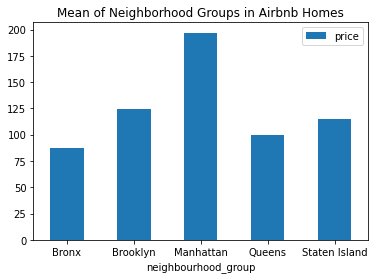

In [21]:
# type(df.groupby('neighbourhood_group')['price'].mean().to_frame())
ngdf = df.groupby('neighbourhood_group')['price'].mean().to_frame()
ngdf.plot.bar(y='price', rot=0, title='Mean of Neighborhood Groups in Airbnb Homes')


<AxesSubplot:title={'center':'Median of Neighborhood Groups in Airbnb Homes'}, xlabel='neighbourhood_group'>

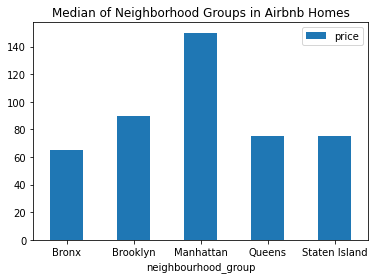

In [22]:
ngdf = df.groupby('neighbourhood_group')['price'].median().to_frame()
ngdf.plot.bar(y='price', rot=0, title='Median of Neighborhood Groups in Airbnb Homes')

<AxesSubplot:title={'center':'Standard Deviation of Neighborhood Groups in Airbnb Homes'}, xlabel='neighbourhood_group'>

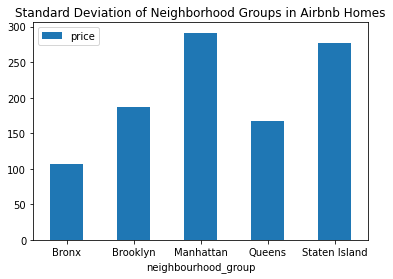

In [23]:
ngdf = df.groupby('neighbourhood_group')['price'].std().to_frame()
ngdf.plot.bar(y='price', rot=0, title='Standard Deviation of Neighborhood Groups in Airbnb Homes')

In [24]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


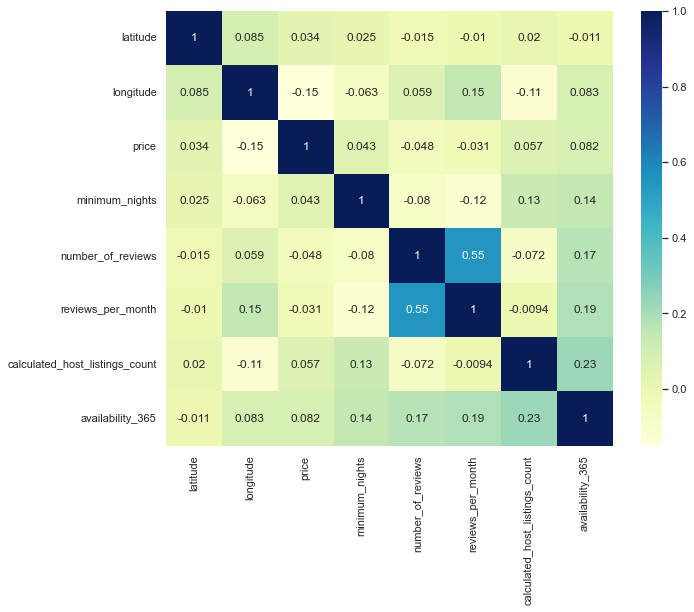

In [26]:
# Interesting Features:
# Most positive correlations:
# Reviews per month and number of reviews (0.55). This makes sense because the number of reviews per month is the total number of reviews 
# divided by the number of months a property was listed for.
# Most negative correlations:
# Minimum nights and reviews per month
corrdf = df.copy()
corrdf = corrdf.drop(columns=['id', 'host_id'])
dataplot = sb.heatmap(corrdf.corr(), cmap="YlGnBu", annot=True)

sb.set(rc = {'figure.figsize':(10,8)})
plt.show()